In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
title = "Software Developer"  
location = "San Francisco"
date = "2025-11-21"
NUMBER_OF_JOBS_TO_FETCH = 600
SAVE_DATA = True

In [3]:
jobs_df = pd.read_csv(f'./results/jobs_{title}_{location}_{date}.csv')
jobs_df.head(10)

,job_title,company_name,location,time_posted,num_applicants
0,Software Engineer,Sana,Stockholm,4 weeks ago,0
1,Backend Engineer (Learn),Sana,Stockholm,4 weeks ago,67
2,Full-stack developer,TMC Sweden,Stockholm,1 week ago,66
3,"Software Engineer, Backend",Truecaller,Stockholm,2 days ago,89
4,Front-End Developer,Checkin.com,Stockholm,1 month ago,0
5,Junior Web Developer,Leadstar Media,Stockholm,3 weeks ago,0
6,Software Engineer,Nordiska,Stockholm,1 week ago,26
7,Software Engineer,Nordiska,Stockholm,1 week ago,31
8,Game developer,Nolimit City®,Stockholm,3 days ago,0
9,Backend developer,Kivra,Stockholm,3 months ago,71


In [4]:
skill_usage = pd.read_csv(f"./results/skills_{title}_{location}_{date}.csv")
skill_usage.head(20)

,Programming Skill,Number of Job Postings
0,Git,129
1,Java,99
2,Python,83
3,AWS,76
4,CI/CD,76
5,SQL,75
6,React,71
7,Rust,68
8,DevOps,66
9,Azure,62


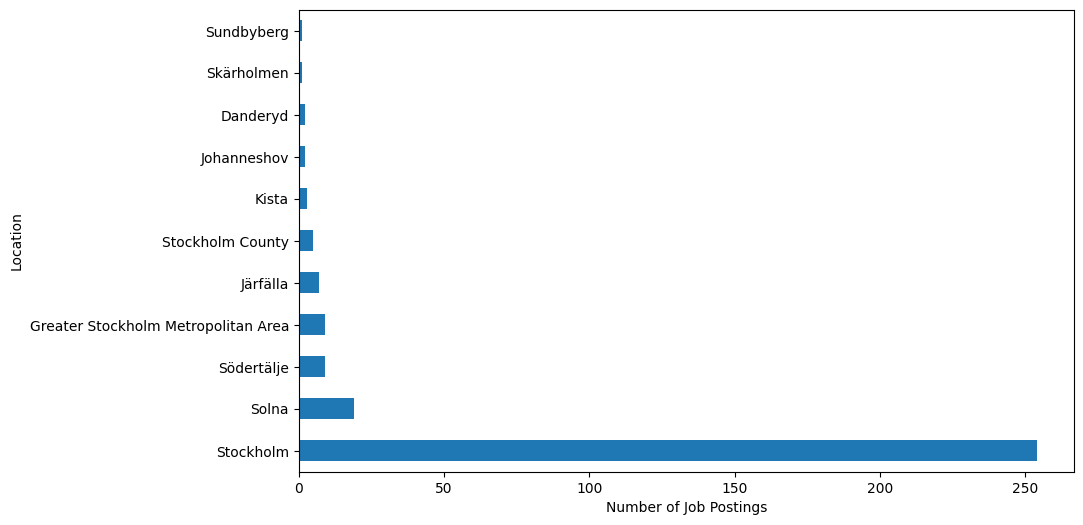

In [5]:
jobs_df["location"].value_counts().head(15).plot(kind='barh', figsize=(10, 6))
plt.ylabel('Location')
plt.xlabel('Number of Job Postings')
plt.savefig(f'./results/job_locations_{title}_{location}.png', bbox_inches='tight')
plt.show()

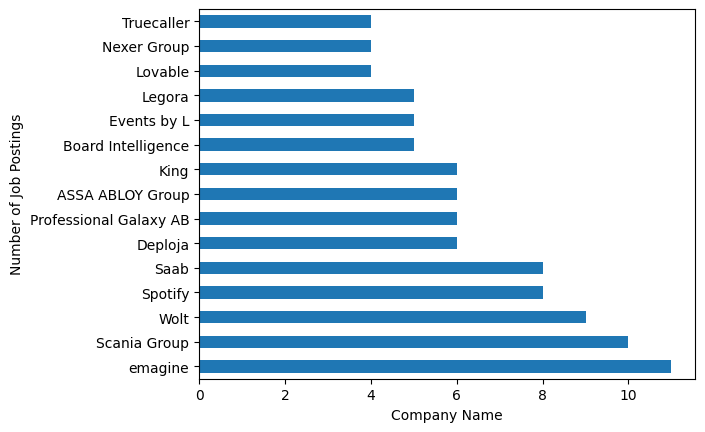

In [6]:
jobs_df["company_name"].value_counts().head(15).plot(kind='barh')
plt.xlabel('Company Name')
plt.ylabel('Number of Job Postings')
plt.savefig(f'./results/top_companies_{title}_{location}.png', )
plt.show()

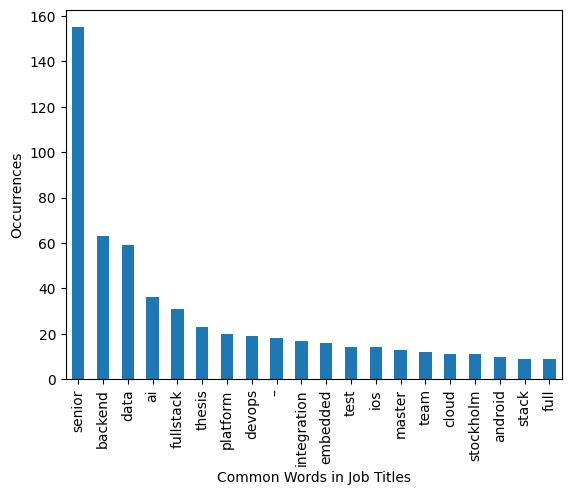

In [7]:
jobs_df['job_title_cleaned'] = jobs_df['job_title'].str.replace(r'[\/\-\,\(\)\.]', ' ', regex=True)
all_words = ' '.join(jobs_df['job_title_cleaned'].dropna().tolist()).lower().split()
word_counts = pd.Series(all_words).value_counts()
common_words = word_counts[word_counts > 2]
common_words.plot(kind='bar')
common_words = common_words.drop(errors="ignore", labels=['developer', "utvecklare", "mjukvaruutvecklare", 'engineer', 'software', 'and', 'lead', "iii" 'ii', 'i', 'working', 'from', 'home', 'm/f/d', 'h/f', 'the', 'a', 'to', 'in', 'of', 'for', 'with', 'on', 'at', 'as', 'is', 'by', 'an', "inom", "för", "all", "+", "-", "&", "|", "till"])
common_words = common_words.head(20)
common_words.plot(kind='bar')
plt.xlabel('Common Words in Job Titles')
plt.ylabel('Occurrences')
plt.savefig(f'./results/common_words_job_titles_{title}_{location}.png')
plt.show()

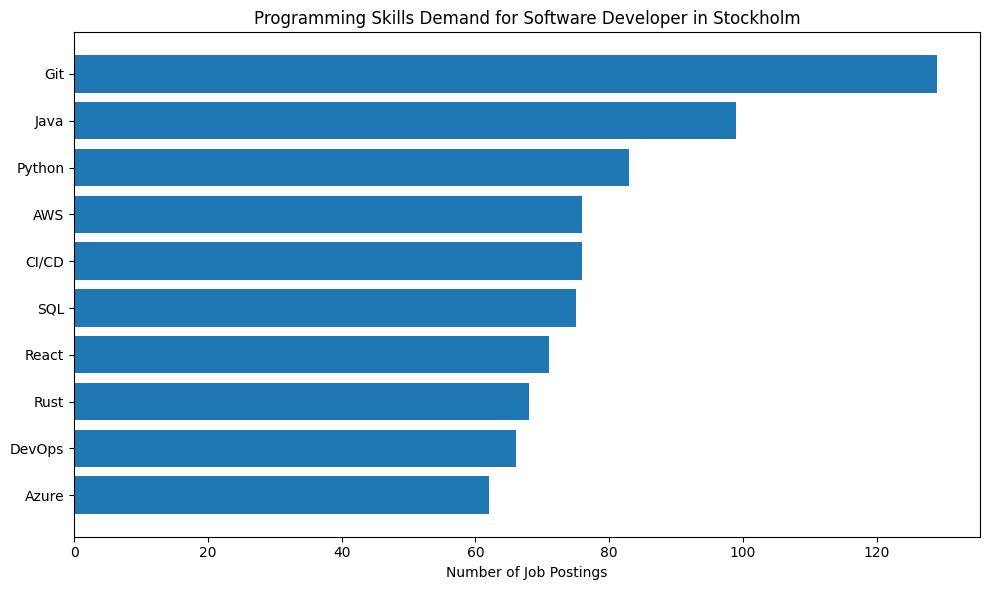

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(skill_usage['Programming Skill'].iloc[:10], skill_usage['Number of Job Postings'].iloc[:10])
plt.xlabel('Number of Job Postings')
plt.title(f'Programming Skills Demand for {title} in {location}')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.savefig(f'./results/skills_demand_{title}_{location}.png')
plt.show()

In [9]:
one_hot_df = pd.read_csv(f"./results/one_hot_skills_{title}_{location}_{date}.csv")
one_hot_df.head(10)

,Erlang,SpringBoot,MATLAB,React,Agda,Dart,Python,NoSQL,.NET,WebAssembly,...,Elm,C++,SQL,Swift,Django,PHP,JRuby,Razor,Java,OpenCV
0,Kivra,CGI,Capgemini Engineering,Sana,NaN,KIX,Odevo,PayPal,Nordiska,Professional Galaxy AB,...,Ubiquiti Inc.,Scania Group,Leadstar Media,Sana,HiQ,Leadstar Media,NaN,NaN,Truecaller,NaN
1,Telia,NaN,ALTEN Sweden,CodeX Digital,NaN,Vitec Software Group,Wolt,SSC - Swedish Space Corporation,EF,NaN,...,Deploja,Alstom,Kivra,Sana,NaN,Humana AB,NaN,NaN,Checkin.com,NaN
2,Kivra,NaN,Getinge,Compileit,NaN,NaN,Professional Galaxy AB,Justera Group,Justera Group,NaN,...,Rasulson Consulting AB,emagine,Spotify,Sana,NaN,Infobric Group,NaN,NaN,Leadstar Media,NaN
3,NaN,NaN,NaN,Odevo,NaN,NaN,Spotify,Wolt,Board Intelligence,NaN,...,VIPAS AB,Applied Intuition,Nolimit City®,European Investment Bank (EIB),NaN,Mint Conseil,NaN,NaN,Nolimit City®,NaN
4,NaN,NaN,NaN,Legora,NaN,NaN,Twine,Knightec,Mint Conseil,NaN,...,Tandem Health,Mojang Studios,360Player,H&M,NaN,NaN,NaN,NaN,Acne Studios,NaN
5,NaN,NaN,NaN,Hemnet,NaN,NaN,Acast,Appostrophe,Telia,NaN,...,Warner Bros. Discovery,Professional Galaxy AB,EF,emagine,NaN,NaN,NaN,NaN,PayPal,NaN
6,NaN,NaN,NaN,Ubiquiti Inc.,NaN,NaN,Scania Group,Ubique Systems,ted&gustaf,NaN,...,SwedQ,emagine,Ubiquiti Inc.,Board Intelligence,NaN,NaN,NaN,NaN,CodeX Digital,NaN
7,NaN,NaN,NaN,StoreSprint,NaN,NaN,Umain,NaN,Deploja,NaN,...,Saab,Saab,Wolt,PayPal,NaN,NaN,NaN,NaN,Spotify,NaN
8,NaN,NaN,NaN,Klarna,NaN,NaN,BCG X,NaN,Worldfavor,NaN,...,Nexer Group,Applied Intuition,PayPal,Board Intelligence,NaN,NaN,NaN,NaN,Nolimit City®,NaN
9,NaN,NaN,NaN,Justera Group,NaN,NaN,Telia,NaN,apotea.se,NaN,...,Saab,Professional Galaxy AB,Board Intelligence,Nextory,NaN,NaN,NaN,NaN,Events by L,NaN


In [10]:
skill_usage = pd.read_csv(f"./results/skill_usage_{title}_{location}_{date}.csv")
skill_usage.head(20)

,index,Number of Companies
0,Git,92
1,Java,70
2,Python,61
3,SQL,59
4,React,58
5,AWS,57
6,CI/CD,56
7,Azure,55
8,DevOps,48
9,Agile,47


In [11]:
skill_usage.head(10).to_clipboard()